(-3.0, 3.0)

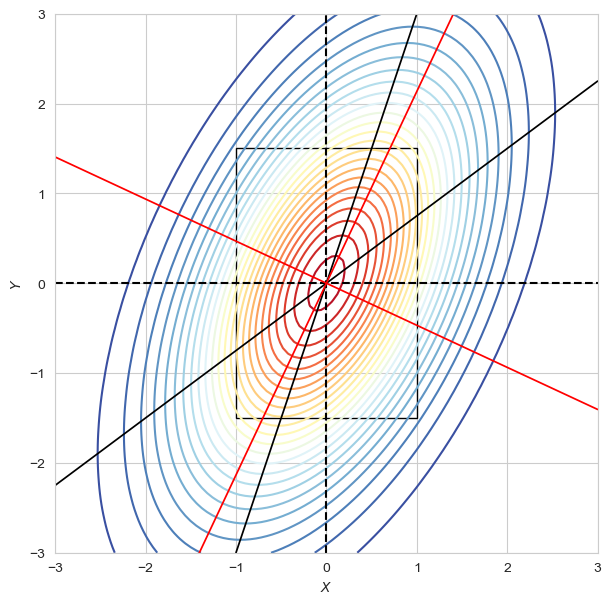

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm # Colormaps
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from scipy.stats import norm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Rectangle

# parameters

rho     = 0.5  # 相关系数
sigma_X = 1    
sigma_Y = 1.5

mu_X = 0
mu_Y = 0

width = 3
# 平均值
mu    = [mu_X, mu_Y]
# 协方差矩阵
Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho], 
        [sigma_X*sigma_Y*rho, sigma_Y**2]]

X = np.linspace(-width,width,101)
Y = np.linspace(-width,width,101)

XX, YY = np.meshgrid(X, Y)

XXYY = np.dstack((XX, YY))
# 创建多元正态分布实例
bi_norm = multivariate_normal(mu, Sigma)
# 计算概率密度函数值
f_X_Y_joint = bi_norm.pdf(XXYY)

# expectation of Y given X

E_Y_given_X = mu_Y + rho*sigma_Y/sigma_X*(X - mu_X)

# expectation of X given Y

E_X_given_Y = mu_X + rho*sigma_X/sigma_Y*(Y - mu_Y)

# 旋转角度
theta = 1/2*np.arctan(2*rho*sigma_X*sigma_Y/(sigma_X**2 - sigma_Y**2))
k = np.tan(theta)

axis_minor = mu_Y + k*(X - mu_X)
axis_major = mu_Y - 1/k*(X - mu_X)

fig, ax = plt.subplots(figsize=(7, 7))

# Plot bivariate normal
plt.contour(XX, YY, f_X_Y_joint, 25, cmap=cm.RdYlBu_r)
plt.axvline(x = mu_X, color = 'k', linestyle = '--')
plt.axhline(y = mu_Y, color = 'k', linestyle = '--')

plt.plot(E_X_given_Y,Y, color = 'k', linewidth = 1.25)
plt.plot(X,E_Y_given_X, color = 'k', linewidth = 1.25)

# plot ellipse minor and major axes
plt.plot(X,axis_minor, color = 'r', linewidth = 1.25)
plt.plot(X,axis_major, color = 'r', linewidth = 1.25)

rect = Rectangle(xy = [mu_X - sigma_X, mu_Y - sigma_Y] , 
                 width = 2*sigma_X, 
                 height = 2*sigma_Y,
                 edgecolor = 'k',facecolor="none")

ax.add_patch(rect)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_xlim(-width,width)
ax.set_ylim(-width,width)

C:\Users\ghdong\AppData\Local\Temp\ipykernel_19348\223654913.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  axis_major = - 1/k*X
C:\Users\ghdong\AppData\Local\Temp\ipykernel_19348\223654913.py:58: RuntimeWarning: invalid value encountered in multiply
  axis_major = - 1/k*X


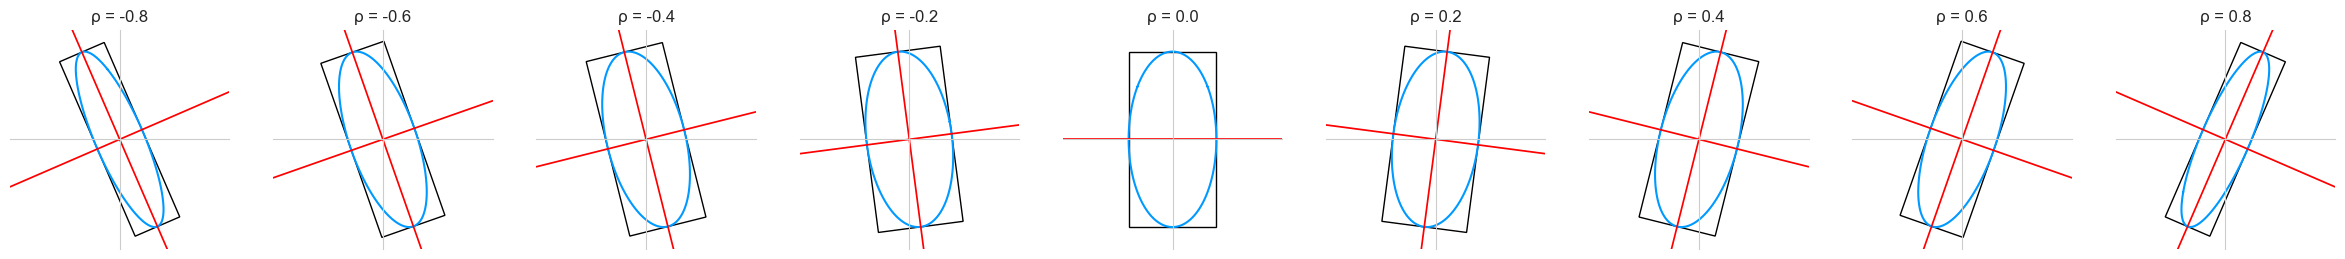

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
# Affine2D 用于创建一个二维仿射变换对象

# 生成数组
x = np.linspace(-4,4,num = 201)
y = np.linspace(-4,4,num = 201)

sigma_X = 1
sigma_Y = 2


xx,yy = np.meshgrid(x,y);

# 相关性系数
RHOs = np.linspace(-0.8,0.8,num = 9)

fig = plt.figure(figsize=(30,5))

for i in range(0,len(RHOs)):
    
    rho = RHOs[i]
    ax = fig.add_subplot(1,len(RHOs),int(i+1))
    # 椭圆
    ellipse = ((xx/sigma_X)**2 - 2*rho*(xx/sigma_X)*(yy/sigma_Y) + (yy/sigma_Y)**2)/(1 - rho**2);
    
    plt.contour(xx,yy,ellipse,levels = [1], colors = '#0099FF')

    # 计算主轴和次轴长度
    A = (sigma_X**2 + sigma_Y**2)/2
    B = np.sqrt((rho*sigma_X*sigma_Y)**2 + ((sigma_X**2 - sigma_Y**2)/2)**2)
    length_major = np.sqrt(A + B)
    length_minor = np.sqrt(A - B)
    
    if sigma_X == sigma_Y and rho >= 0:
        theta = 45

    elif sigma_X == sigma_Y and rho < 0:
        theta = -45
    else:
        theta = 1/2*np.arctan(2*rho*sigma_X*sigma_Y/(sigma_X**2 - sigma_Y**2))
        theta = theta*180/np.pi
    
    if sigma_X >= sigma_Y:
        rect = Rectangle([-length_major, -length_minor] , 
                         width = 2*length_major, 
                         height = 2*length_minor,
                         edgecolor = 'k',facecolor="none",
                         transform=Affine2D().rotate_deg_around(*(0,0), theta)+ax.transData)
        # .rotate_deg_around(*(0,0), theta): 这是 Affine2D 对象的一个方法，用于创建一个围绕指定点（在这里是 (0, 0)）旋转 theta 度的变换
        # ax.transData 是坐标轴的一个属性，它表示一个从数据坐标到屏幕坐标的变换。
        # + 操作符用于组合两个变换
        
    else:
        rect = Rectangle([-length_minor, -length_major] , 
                         width = 2*length_minor, 
                         height = 2*length_major,
                         edgecolor = 'k',facecolor="none",
                         transform=Affine2D().rotate_deg_around(*(0,0), theta)+ax.transData)
    
    ax.add_patch(rect)

    X = np.linspace(-2.5,2.5,101)
    k = np.tan(theta/180*np.pi)
    axis_minor = k*X
    axis_major = - 1/k*X
    plt.plot(X,axis_minor, color = 'r', linewidth = 1.25)
    plt.plot(X,axis_major, color = 'r', linewidth = 1.25)

    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_title('\u03C1 = %0.1f' %rho)